In [23]:
import numpy as np
import torch
import torch.nn.functional as F
from src.render.mesh_renderer import MeshPointsRenderer
from src.config import get_parser

from PIL import Image
from  torchvision.transforms import ToPILImage

config = get_parser().parse_args(args=[])  
config.adversarial_data_patch_size = 512
config.raster_image_size = 256

In [18]:
device = torch.device("cuda")
R = MeshPointsRenderer(config).to(device)
R.setup(device)

In [19]:
loaded = np.load('./data/blueprint_16_512.npz')
points = torch.tensor(loaded['points']).to(device)

_, _, w, h = points.shape
faces = torch.tensor(make_faces(w, h)).to(device)

points.shape, faces.shape

(torch.Size([16, 3, 512, 512]), torch.Size([522242, 3]))

In [20]:
images = R(points)
images.shape

torch.Size([16, 3, 256, 256])

torch.Size([3, 1034, 1034])


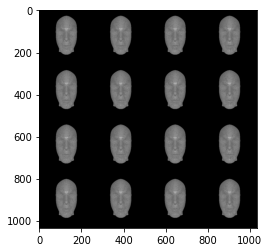

In [26]:
import matplotlib.pyplot as plt
import torchvision



r_images = R(points, mean_std=None, align=False)
print(images.shape)
images = torchvision.utils.make_grid(r_images, nrow=4)
#self.writer.add_image('images', grid, step_no+1)



plt.imshow(images.permute(1, 2, 0).cpu()); 

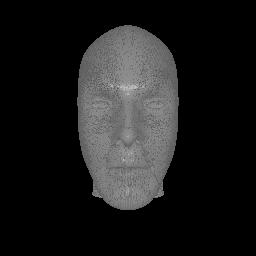

In [24]:
ToPILImage()(r_images[0]);

In [28]:
points[0].shape

torch.Size([3, 512, 512])

torch.Size([3, 1034, 1034])


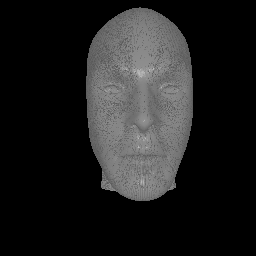

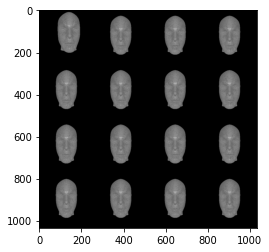

In [36]:
points1 = points.clone()
translate = torch.tensor([0.1, 0.1, 0.1], device=device).reshape(3, 1, 1)
translate.shape

points1[0] += translate

r_images = R(points1, mean_std=None, align=False)
print(images.shape)
images = torchvision.utils.make_grid(r_images, nrow=4)
#self.writer.add_image('images', grid, step_no+1)

plt.imshow(images.permute(1, 2, 0).cpu()); 
ToPILImage()(r_images[0])

In [38]:
torch.randn((8, 3)).abs().max()

tensor(2.0841)

torch.Size([3, 1034, 1034])


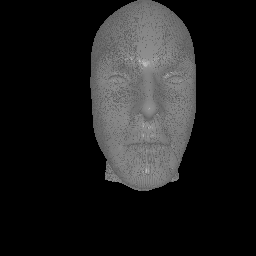

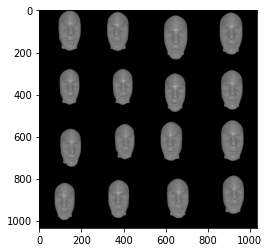

In [47]:
translations = torch.FloatTensor(16, 3).uniform_(-0.2, 0.2).reshape(-1, 3, 1, 1).to(device)
translations.shape

points1 = points.clone()
translate = torch.tensor([0.1, 0.1, 0.1], device=device).reshape(3, 1, 1)
translate.shape

points1 += translations

r_images = R(points1, mean_std=None, align=False)
print(images.shape)
images = torchvision.utils.make_grid(r_images, nrow=4)
#self.writer.add_image('images', grid, step_no+1)

plt.imshow(images.permute(1, 2, 0).cpu()); 
ToPILImage()(r_images[0])

torch.Size([3, 1034, 1034])


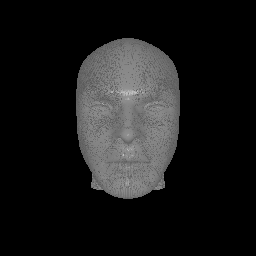

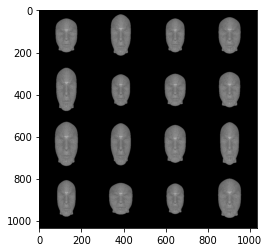

In [49]:
scalings = torch.FloatTensor(16, 3).uniform_(0.8, 1.2).reshape(-1, 3, 1, 1).to(device)
scalings.shape

points1 = points.clone()

points1 *= scalings

r_images = R(points1, mean_std=None, align=False)
print(images.shape)
images = torchvision.utils.make_grid(r_images, nrow=4)
#self.writer.add_image('images', grid, step_no+1)

plt.imshow(images.permute(1, 2, 0).cpu()); 
ToPILImage()(r_images[0])

torch.Size([3, 1034, 1034])


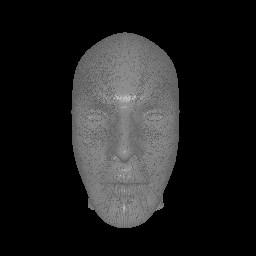

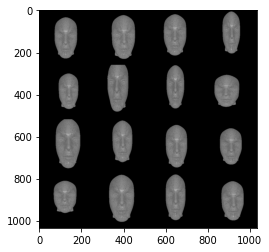

In [52]:
import torch
import torch.nn.functional as F


def GeoAugment(x, policy='', channels_first=True):
    if policy:
        if not channels_first:
            x = x.permute(0, 3, 1, 2)
        for p in policy.split(','):
            for f in AUGMENT_FNS[p]:
                x = f(x)
        if not channels_first:
            x = x.permute(0, 2, 3, 1)
        x = x.contiguous()
    return x




def rand_translation(x, ratio=0.125):
    translations = torch.FloatTensor(16, 3).uniform_(-ratio, ratio)     
    x += translations.reshape(-1, 3, 1, 1).to(x.device)
    return x

def rand_scaling(x, ratio=0.2):
    scalings = torch.FloatTensor(16, 3).uniform_(1-ratio, 1+ratio)     
    x *= scalings.reshape(-1, 3, 1, 1).to(x.device)
    return x


AUGMENT_FNS = {
    'scaling': [rand_scaling],
    'translation': [rand_translation],    
}

points1 = points.clone()

points1 = GeoAugment(points1, 'scaling,translation')


r_images = R(points1, mean_std=None, align=False)
print(images.shape)
images = torchvision.utils.make_grid(r_images, nrow=4)
#self.writer.add_image('images', grid, step_no+1)

plt.imshow(images.permute(1, 2, 0).cpu()); 
ToPILImage()(r_images[0])